# Análise Explotória - Conjuntos de Dados Kaggle

In [1]:
from pandas import read_csv, DataFrame, concat
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = read_csv('01-dados/autos.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

In [4]:
data.isnull().sum()

dateCrawled              0
name                     0
seller                   0
offerType                0
price                    0
abtest                   0
vehicleType              0
yearOfRegistration       0
gearbox                  0
powerPS                  0
model                    0
kilometer                0
monthOfRegistration      0
fuelType               189
brand                    0
notRepairedDamage        0
dateCreated              0
postalCode               0
lastSeen                 0
yearOfCreation           0
yearCrawled              0
monthOfCreation          0
monthCrawled             0
NoOfDaysOnline           0
NoOfHrsOnline            0
yearsOld                 0
monthsOld                0
dtype: int64

In [5]:
# Como a quantidade de dados nulos é menor que 5% dos dados eles serão apagados
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
yearOfCreation         0
yearCrawled            0
monthOfCreation        0
monthCrawled           0
NoOfDaysOnline         0
NoOfHrsOnline          0
yearsOld               0
monthsOld              0
dtype: int64

In [7]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


## Distribuição dos Veículos por Ano de Registro

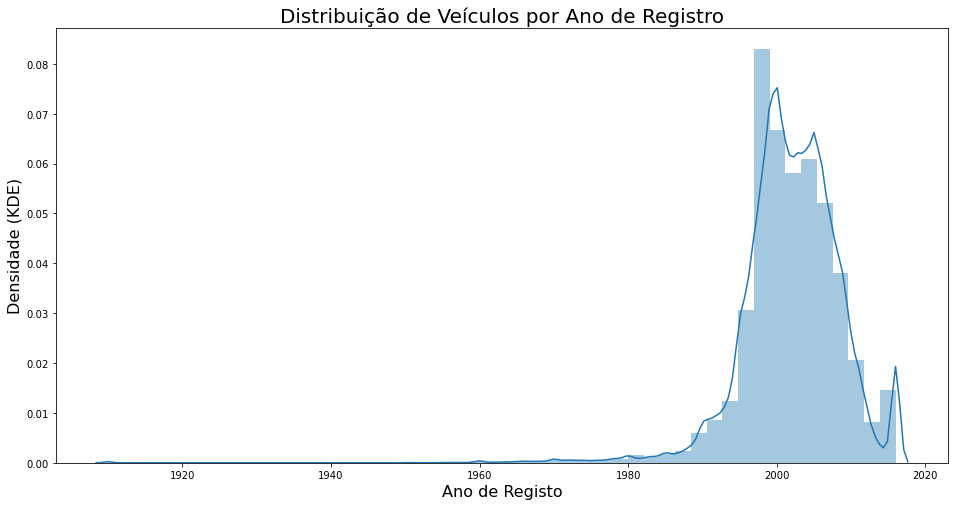

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(data['yearOfRegistration'],kde=True,ax=ax)
ax.set_title('Distribuição de Veículos por Ano de Registro',fontsize=20)
plt.ylabel('Densidade (KDE)', fontsize=16)
plt.xlabel('Ano de Registo', fontsize=16)
plt.show()

## Faixa de Preço Pelo Tipo de Veículo

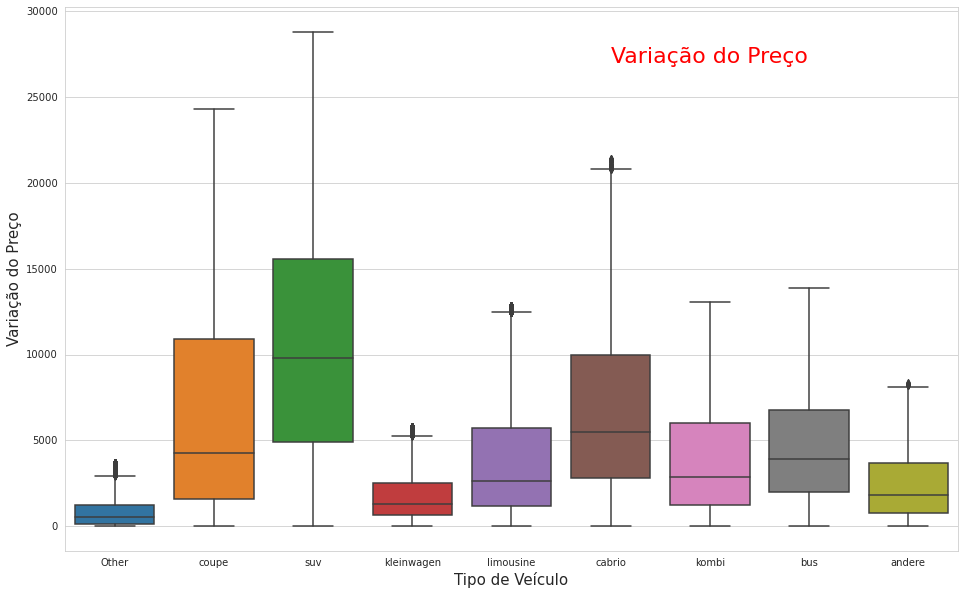

In [9]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16,10))
sns.boxplot(x='vehicleType', y='price', data=data)
ax.text(5,27000,'Variação do Preço',fontsize=22,color='r')
ax.xaxis.set_label_text('Tipo de Veículo', fontdict={'size':15})
ax.yaxis.set_label_text('Variação do Preço', fontdict={'size':15})
plt.show()

## Contagem Total de Veículos à Vendas Pelo Tipo de Veículo

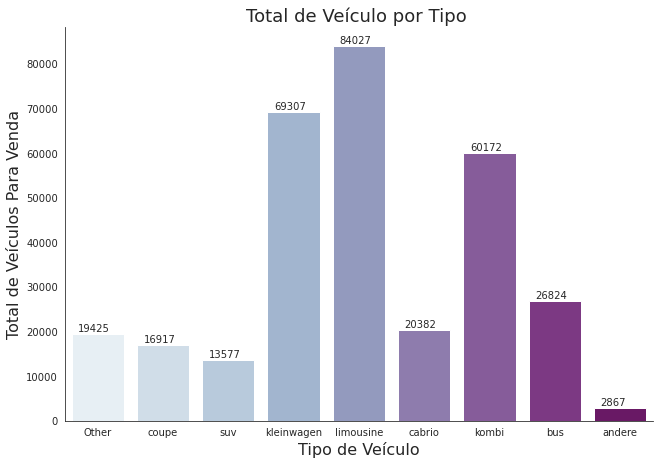

In [10]:
sns.set_style("white")
g = sns.factorplot(x="vehicleType", data=data, kind="count", palette="BuPu", size=6, aspect=1.5)
g.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})
g.ax.set_title("Total de Veículo por Tipo ",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

## Vepículo por Marca

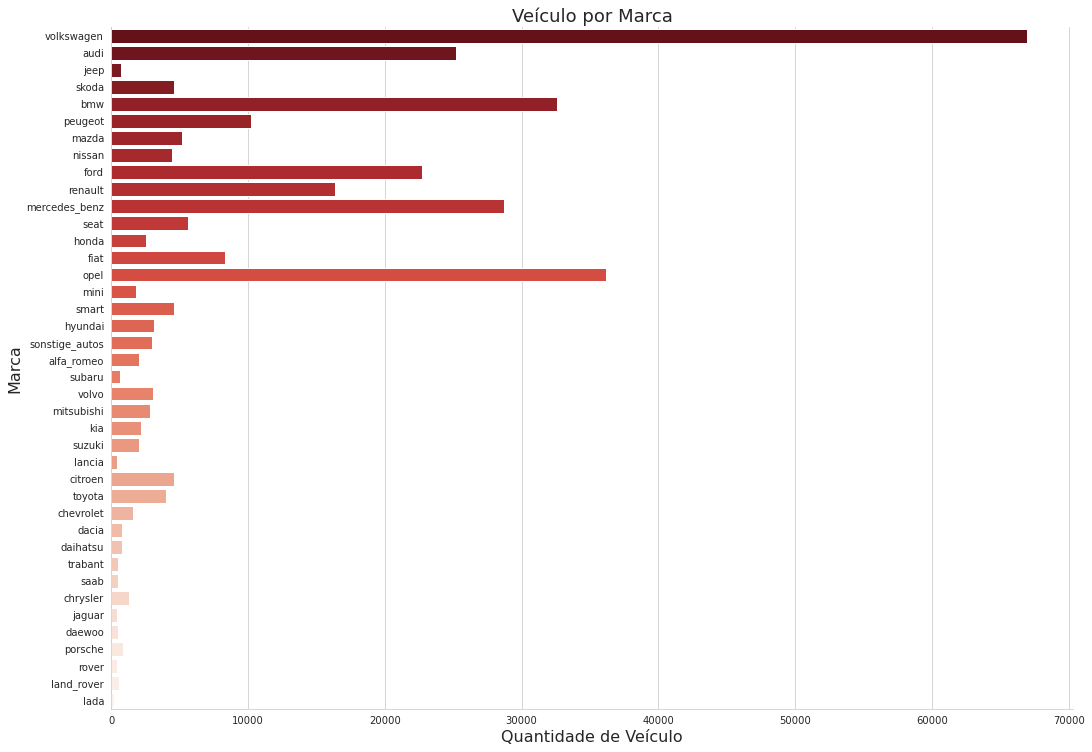

In [11]:
sns.set_style('whitegrid')
p = sns.factorplot(y='brand', data=data, kind='count', palette='Reds_r', size=10, aspect=1.5)
p.ax.set_title('Veículo por Marca', fontdict={'size':18})
p.ax.xaxis.set_label_text('Quantidade de Veículo', fontdict={'size':16})
p.ax.yaxis.set_label_text('Marca', fontdict={'size':16})
plt.show()

## Preço Médio dos Veículos por Tipo e Câmbio

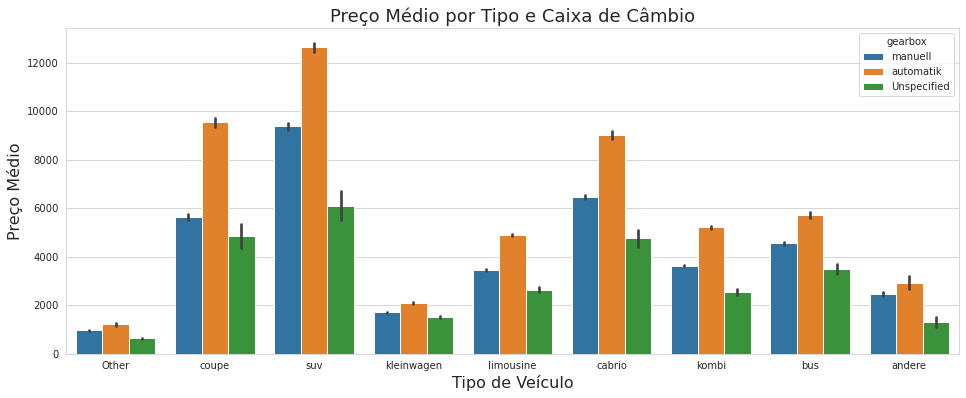

In [12]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='vehicleType', y='price', hue='gearbox', data=data)
ax.set_title('Preço Médio por Tipo e Caixa de Câmbio', fontdict={'size':18})
ax.xaxis.set_label_text('Tipo de Veículo', fontdict={'size':16})
ax.yaxis.set_label_text('Preço Médio', fontdict={'size':16})
plt.show()

## Preço Médio por Tipo de Combustível e Câmbio

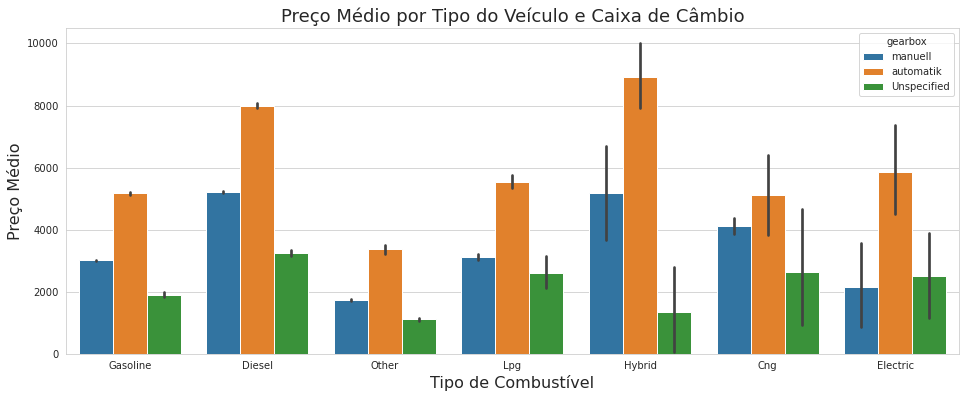

In [13]:
fig, ax=plt.subplots(figsize=(16,6))
sns.barplot(x='fuelType', y='price',hue='gearbox', data=data)
ax.set_title('Preço Médio por Tipo do Veículo e Caixa de Câmbio', fontdict={'size':18})
ax.xaxis.set_label_text('Tipo de Combustível', fontdict={'size':16})
ax.yaxis.set_label_text('Preço Médio', fontdict={'size':16})
plt.show()

## Potência Média por Tipo e Caixa de Câmbio

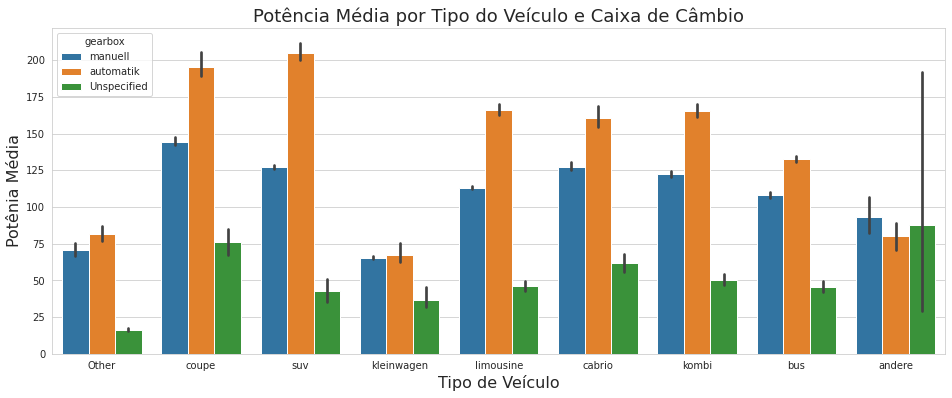

In [14]:
fig, ax=plt.subplots(figsize=(16,6))
sns.barplot(x='vehicleType', y='powerPS', hue='gearbox', data=data)
ax.set_title('Potência Média por Tipo do Veículo e Caixa de Câmbio',fontdict={'size':18})
ax.xaxis.set_label_text('Tipo de Veículo',fontdict={'size':16})
ax.yaxis.set_label_text('Potênia Média', fontdict={'size':16})
plt.show()

In [15]:
x = data.drop(columns=['price','dateCreated','lastSeen','dateCrawled','yearCrawled','monthCrawled','monthsOld'])

In [16]:
x.head()

,name,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,yearOfCreation,monthOfCreation,NoOfDaysOnline,NoOfHrsOnline,yearsOld
0,Golf_3_1.6,privat,Offer,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,70435,2016,March,14,3,23
1,A5_Sportback_2.7_Tdi,privat,Offer,test,coupe,2011,manuell,190,Other,125000,May,Diesel,audi,Yes,66954,2016,March,14,1,5
2,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,test,suv,2004,automatik,163,grand,125000,Aug,Diesel,jeep,Other,90480,2016,March,22,12,12
3,GOLF_4_1_4__3TÜRER,privat,Offer,test,kleinwagen,2001,manuell,75,golf,150000,Jul,Gasoline,volkswagen,No,91074,2016,March,0,17,15
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,test,kleinwagen,2008,manuell,69,fabia,90000,Jul,Diesel,skoda,No,60437,2016,March,6,10,8


In [17]:
encode = x.loc[:, x.dtypes == np.object]
sobra = x.loc[:, x.dtypes == np.int64]

In [18]:
x = x.apply(LabelEncoder().fit_transform)

In [19]:
f = [x,sobra]

In [20]:
x = concat(f,axis=1)

In [21]:
x = MinMaxScaler().fit_transform(x)

In [22]:
y = data['price']

In [23]:
x_4 = SelectKBest(chi2, k=4).fit_transform(x,y)
x_6 = SelectKBest(chi2, k=6).fit_transform(x,y)
x_8 = SelectKBest(chi2, k=8).fit_transform(x,y)
x_10 = SelectKBest(chi2, k=10).fit_transform(x,y)
x_12 = SelectKBest(chi2, k=12).fit_transform(x,y)

## Regressão Multipla com StatsModel

In [24]:
vl = sm.add_constant(x)
m1 = sm.OLS(y,vl)
m1 = m1.fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:34:37   Log-Likelihood:            -2.9518e+06
No. Observations:              313498   AIC:                         5.904e+06
Df Residuals:                  313473   BIC:                         5.904e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2970.3141    972.886      3.053      0.002    1063.485    4877.143
x1          -608.9788     31.202    -19.517      0.000    -670.134    -547.823
x2         -1298.0870   1715.403     -0.757      0.449   -4660.229    2064.055
x3          -497.7801    939.616     -0.530      0.596   -2339.401    1343.841
x4           -14.2964     10.633     -1.345      0.179     -35.137       6.544
x5           387.5455     21.643     17.906      0.000     345.125     429.966
x6          4.071e+04   1085.336     37.509      0.000    3.86e+04    4.28e+04
x7         -1513.8254     19.343    -78.262      0.000   -1551.737   -1475.913
x8          1.972e+04     70.487    279.755      0.000    1.96e+04    1.99e+04
x9           560.6304     21.222     26.417      0.000     519.036     602.225
x10         9162.2189    125.320     73.111      0.000    8916.596    9407.842
x11          -42.4696     17.906     -2.372      0.018     -77.564      -7.375
x12        -2968.4904     25.479   -116.508      0.000   -3018.428   -2918.553
x13          396.5616     27.147     14.608      0.000     343.354     449.770
x14        -1577.1864     16.241    -97.112      0.000   -1609.018   -1545.355
x15        -1430.1599    215.458     -6.638      0.000   -1852.451   -1007.868
x16         1104.8996    452.379      2.442      0.015     218.249    1991.550
x17         -694.9184     22.930    -30.306      0.000    -739.860    -649.977
x18         4466.7705    962.307      4.642      0.000    2580.677    6352.864
x19          -31.9637      9.504     -3.363      0.001     -50.591     -13.336
x20        -3.774e+04   1021.582    -36.942      0.000   -3.97e+04   -3.57e+04
x21        -3.654e+04   1148.969    -31.803      0.000   -3.88e+04   -3.43e+04
x22        -3.054e+04    628.444    -48.601      0.000   -3.18e+04   -2.93e+04
x23        -1.251e+04    108.203   -115.597      0.000   -1.27e+04   -1.23e+04
x24         1746.1949    205.592      8.493      0.000    1343.240    2149.150
x25         1104.8996    452.379      2.442      0.015     218.249    1991.550
x26          768.6050   3646.947      0.211      0.833   -6379.308    7916.518
x27          -31.9637      9.504     -3.363      0.001     -50.591     -13.336
x28         3.951e+04   1214.972     32.520      0.000    3.71e+04    4.19e+04
==============================================================================
Omnibus:                   106320.659   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           603780.909
Skew:                           1.526   Prob(JB):                         0.00
Kurtosis:                       9.075   Cond. No.                     1.05e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [25]:
vl = sm.add_constant(x_4)
m2 = sm.OLS(y,vl)
m2 = m2.fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                 5.411e+04
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:34:37   Log-Likelihood:            -2.9756e+06
No. Observations:              313498   AIC:                         5.951e+06
Df Residuals:                  313493   BIC:                         5.951e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7726.2046     27.849    277.428      0.000    7671.621    7780.789
x1          2.006e+04     63.479    316.053      0.000    1.99e+04    2.02e+04
x2         -3756.1909     26.316   -142.735      0.000   -3807.769   -3704.612
x3         -1893.5589     17.281   -109.574      0.000   -1927.429   -1859.688
x4         -5567.2722     24.040   -231.588      0.000   -5614.389   -5520.155
==============================================================================
Omnibus:                    84882.320   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           390876.917
Skew:                           1.253   Prob(JB):                         0.00
Kurtosis:                       7.863   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
vl = sm.add_constant(x_6)
modelo = sm.OLS(y,vl)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                 4.411e+04
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:34:37   Log-Likelihood:            -2.9620e+06
No. Observations:              313498   AIC:                         5.924e+06
Df Residuals:                  313491   BIC:                         5.924e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8863.5949     30.265    292.868      0.000    8804.277    8922.913
x1           249.2378     22.058     11.299      0.000     206.004     292.472
x2          1.878e+04     62.458    300.605      0.000    1.87e+04    1.89e+04
x3         -2880.5484     26.070   -110.494      0.000   -2931.644   -2829.452
x4         -1690.7937     16.637   -101.631      0.000   -1723.401   -1658.187
x5          -1.32e+04     78.531   -168.049      0.000   -1.34e+04    -1.3e+04
x6         -4984.3033     23.277   -214.128      0.000   -5029.926   -4938.681
==============================================================================
Omnibus:                   105386.049   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           630449.888
Skew:                           1.493   Prob(JB):                         0.00
Kurtosis:                       9.272   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
vl = sm.add_constant(x_8)
modelo = sm.OLS(y,vl)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 3.338e+04
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:34:37   Log-Likelihood:            -2.9614e+06
No. Observations:              313498   AIC:                         5.923e+06
Df Residuals:                  313489   BIC:                         5.923e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8786.5537     32.880    267.230      0.000    8722.110    8850.998
x1           305.1220     22.097     13.808      0.000     261.813     348.431
x2          1.883e+04     64.209    293.280      0.000    1.87e+04     1.9e+04
x3         -2845.4249     26.054   -109.214      0.000   -2896.490   -2794.360
x4           112.6358     16.734      6.731      0.000      79.837     145.435
x5         -1682.0486     16.615   -101.237      0.000   -1714.613   -1649.484
x6         -8.063e+04   1927.209    -41.838      0.000   -8.44e+04   -7.69e+04
x7         -4923.5260     23.293   -211.373      0.000   -4969.180   -4877.872
x8          7.778e+04   2221.401     35.014      0.000    7.34e+04    8.21e+04
==============================================================================
Omnibus:                   106217.668   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           645169.686
Skew:                           1.502   Prob(JB):                         0.00
Kurtosis:                       9.354   Cond. No.                         900.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
vl = sm.add_constant(x_10)
modelo = sm.OLS(y,vl)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                 2.759e+04
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:34:37   Log-Likelihood:            -2.9590e+06
No. Observations:              313498   AIC:                         5.918e+06
Df Residuals:                  313487   BIC:                         5.918e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7244.7381     39.892    181.609      0.000    7166.551    7322.925
x1             1.4828     10.868      0.136      0.891     -19.817      22.783
x2           216.4479     21.967      9.853      0.000     173.394     259.502
x3          1.889e+04     63.728    296.366      0.000    1.88e+04     1.9e+04
x4          8863.4329    127.789     69.360      0.000    8612.971    9113.895
x5         -2894.9925     25.866   -111.922      0.000   -2945.690   -2844.295
x6            94.7173     16.609      5.703      0.000      62.163     127.271
x7         -1582.5022     16.551    -95.612      0.000   -1614.942   -1550.062
x8         -8.192e+04   1912.686    -42.828      0.000   -8.57e+04   -7.82e+04
x9         -1.241e+04    110.399   -112.420      0.000   -1.26e+04   -1.22e+04
x10         8.004e+04   2204.799     36.303      0.000    7.57e+04    8.44e+04
==============================================================================
Omnibus:                   109383.553   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           658727.751
Skew:                           1.556   Prob(JB):                         0.00
Kurtosis:                       9.383   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
vl = sm.add_constant(x_12)
modelo = sm.OLS(y,vl)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                 2.399e+04
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:34:37   Log-Likelihood:            -2.9558e+06
No. Observations:              313498   AIC:                         5.912e+06
Df Residuals:                  313485   BIC:                         5.912e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8229.6570     42.415    194.028      0.000    8146.525    8312.789
x1            -1.2004     10.758     -0.112      0.911     -22.287      19.886
x2           400.4295     21.892     18.291      0.000     357.522     443.337
x3         -1511.3778     19.565    -77.249      0.000   -1549.725   -1473.031
x4          1.855e+04     63.232    293.360      0.000    1.84e+04    1.87e+04
x5           483.0837     21.295     22.685      0.000     441.346     524.822
x6          9449.9102    126.858     74.492      0.000    9201.271    9698.549
x7         -2999.1778     25.757   -116.441      0.000   -3049.661   -2948.695
x8           -38.7806     18.262     -2.124      0.034     -74.573      -2.988
x9         -1652.0399     16.411   -100.665      0.000   -1684.205   -1619.874
x10        -7.791e+04   1894.151    -41.132      0.000   -8.16e+04   -7.42e+04
x11        -1.282e+04    109.495   -117.070      0.000    -1.3e+04   -1.26e+04
x12         7.548e+04   2183.425     34.569      0.000    7.12e+04    7.98e+04
==============================================================================
Omnibus:                   104441.251   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           615649.938
Skew:                           1.483   Prob(JB):                         0.00
Kurtosis:                       9.191   Cond. No.                     1.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Gradient Boosting Regressor

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=.1, max_depth=10, loss='ls')
gbr.fit(x_train, y_train)
mean_squared_error(y_test, gbr.predict(x_test))
gbr.score(x_test,y_test)

0.880802270903196

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_4,y, test_size=0.2)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=.1, max_depth=10, loss='ls')
gbr.fit(x_train, y_train)
mean_squared_error(y_test, gbr.predict(x_test))
gbr.score(x_test,y_test)

0.6282042414951836

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_6,y, test_size=0.2)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=.1, max_depth=10)
gbr.fit(x_train, y_train)
mean_squared_error(y_test, gbr.predict(x_test))
gbr.score(x_test,y_test)

0.8371685216537814

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_8,y, test_size=0.2)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=.1, max_depth=10)
gbr.fit(x_train, y_train)
mean_squared_error(y_test, gbr.predict(x_test))
gbr.score(x_test,y_test)

0.8644329482534886

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_10,y, test_size=0.2)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=.1, max_depth=10)
gbr.fit(x_train, y_train)
mean_squared_error(y_test, gbr.predict(x_test))
gbr.score(x_test,y_test)

0.8597821707410023

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_12,y, test_size=0.2)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=.1, max_depth=10)
gbr.fit(x_train, y_train)
mean_squared_error(y_test, gbr.predict(x_test))
gbr.score(x_test,y_test)

0.8735211321861729